In [60]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

nltk.download('punkt')

# Download the Finnish stopwords list and save it as "finnish_stopwords.txt"
# Then load the stopwords from the file
with open('C:\\Users\\aghaffar23\\OneDrive - Oulun yliopisto\\Work\\Uni\\Courses\\NLP\\codes\\finnish_stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords_list = file.read().splitlines()

# Add your selected keywords to the list of stopwords
selected_keyword = ["well-being", "happiness", "life satisfaction", "liveability"]
translations = ["hyvinvointi", "vointi", "onnellisuus", "onni", "elämään tyytyväisyyttä", "elävyyttä"]
translations = translations + selected_keyword

# Load the CSV file into a DataFrame
df = pd.read_csv('data/parsed_data_sample.csv')

# Filter out only threads
threads_df = df[df['msg_type'] == 'thread_start']

# Function to remove stopwords, punctuation, numbers, and check if the keyword is in the text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if not any(char in word for char in string.punctuation) and word.lower() not in stopwords_list and not any(char.isdigit() for char in word)]
    
    return ' '.join(filtered_tokens)

def contains_keyword(text):
    tokens = word_tokenize(text)
    return any(translation in tokens for translation in translations)

# Filter threads containing the keyword in title or thread_text
threads_df['thread_text'] = threads_df['thread_text'].apply(preprocess_text)
threads_df['title'] = threads_df['title'].apply(preprocess_text)
filtered_threads = threads_df[threads_df['title'].apply(contains_keyword) | threads_df['thread_text'].apply(contains_keyword)]

# Save the filtered results to a new CSV file
filtered_threads[['title', 'thread_text', 'datetime']].to_csv('data/filtered_threads.csv', index=False)

######## Lemmatizer
# from libvoikko import Voikko

# v = Voikko("fi")

# def lemmatize_finnish(text):
#     analysis = v.analyze(text)
#     if analysis:
#         return analysis[0].get('BASEFORM')
#     return text

# sentence = "juokseminen"
# lemma = lemmatize_finnish(sentence)
# print(lemma)  # Should print "juosta"


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aghaffar23\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_11172\1952846923.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df['thread_text'] = threads_df['thread_text'].apply(preprocess_text)
C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_11172\1952846923.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df['title'] = threads_df['title'

In [76]:
#Section 2
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
# Load the dataset
df = pd.read_csv('data/filtered_threads.csv')  

# Function to extract the year from the 'datetime' column
def extract_year(date_string):
    return int(date_string[:4])

# Create a dictionary to store sub-datasets for each year
yearly_datasets = {}

# Loop through the dataset and separate data for each year
for year in range(2001, 2021):
    # Filter data for the current year
    data_for_year = df[df['datetime'].apply(lambda x: extract_year(x) == year)]
    yearly_datasets[f'{year}'] = data_for_year

# Function to calculate vocabulary for each year
# def get_vocabulary(data):
#     tokens = []
#     for text in data['thread_text']:
#         if isinstance(text, str):  # Check if text is a valid string
#             text = text.lower()  # Convert to lowercase for consistency
#             tokens.extend(word_tokenize(text))
#     fdist = FreqDist(tokens)
#     return fdist  # Use FreqDist to get word frequencies

def get_vocabulary(data):
    vectorizer = CountVectorizer()
    vectorized = vectorizer.fit(data['thread_text'])
    return vectorized

# Create a dictionary to store the vocabulary for each year
vocabulary_by_year = {}

# Calculate vocabulary for each year
for year, data in yearly_datasets.items():
    if data.empty:
        vocabulary_by_year[year] = 0
        continue
    year_vocabulary = get_vocabulary(data)
    total_unique_vocab = len(year_vocabulary.vocabulary_.keys())
    total_vocab_size = sum(year_vocabulary.vocabulary_.values())
    vocabulary_by_year[year] = total_unique_vocab

# # Print or manipulate the vocabulary data as needed
for year, vocab_size in vocabulary_by_year.items():
    print(f"Year {year}: Vocabulary Size = {vocab_size}")

Year 2001: Vocabulary Size = 0
Year 2002: Vocabulary Size = 0
Year 2003: Vocabulary Size = 0
Year 2004: Vocabulary Size = 0
Year 2005: Vocabulary Size = 0
Year 2006: Vocabulary Size = 0
Year 2007: Vocabulary Size = 0
Year 2008: Vocabulary Size = 0
Year 2009: Vocabulary Size = 0
Year 2010: Vocabulary Size = 0
Year 2011: Vocabulary Size = 0
Year 2012: Vocabulary Size = 0
Year 2013: Vocabulary Size = 0
Year 2014: Vocabulary Size = 0
Year 2015: Vocabulary Size = 0
Year 2016: Vocabulary Size = 0
Year 2017: Vocabulary Size = 0
Year 2018: Vocabulary Size = 2993
Year 2019: Vocabulary Size = 0
Year 2020: Vocabulary Size = 0


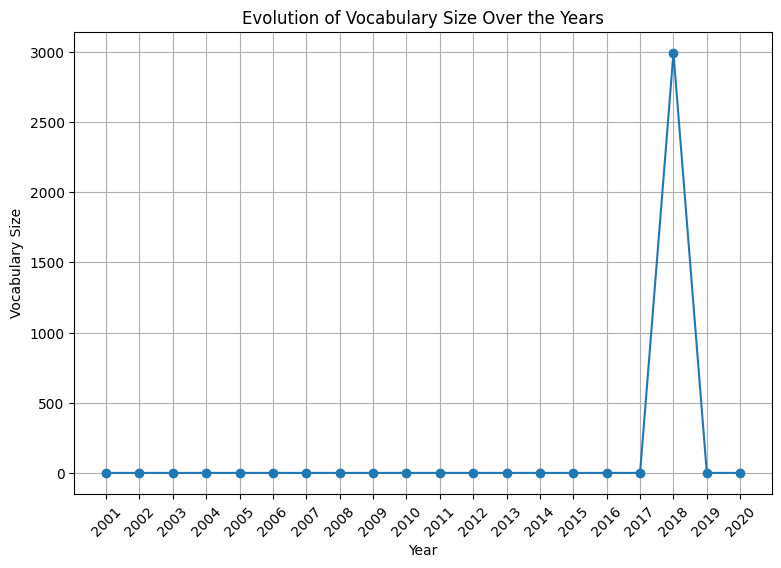

In [77]:
#Section3
import matplotlib.pyplot as plt

# Extract require data
years = list(vocabulary_by_year.keys())
vocab_sizes = [vocab for vocab in vocabulary_by_year.values()]

# Create a line plot to show vocabulary evolution over the years
plt.figure(figsize=(9, 6))
plt.plot(years, vocab_sizes, marker='o', linestyle='-')
plt.title('Evolution of Vocabulary Size Over the Years')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Vocabulary Size')
plt.grid(True)
plt.show()


Year 2018, 80.0% Confidence: 29 points outside bounds
Year 2018, 85.0% Confidence: 27 points outside bounds
Year 2018, 90.0% Confidence: 27 points outside bounds
Year 2018, 95.0% Confidence: 25 points outside bounds


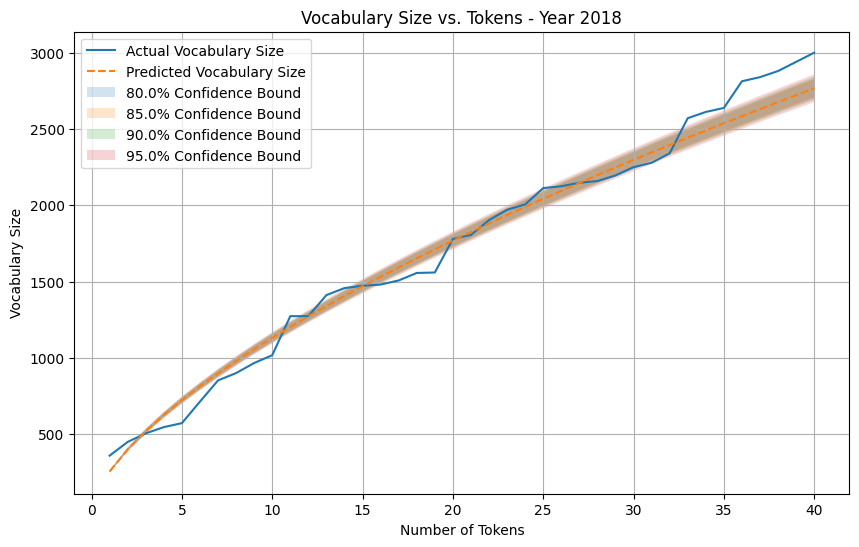

In [78]:
#Section 4
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

results = {}
confidence_levels = [0.8, 0.85, 0.9, 0.95]

# Loop for each year
for year, data in yearly_datasets.items():
    tokens = []
    vocab_sizes = []
    for text in data['thread_text']:
        if isinstance(text, str):
            tokenized = word_tokenize(text)
            tokens.extend(tokenized)
            vocab_sizes.append(len(set(tokens)))

    # Check if there is data for this year
    if not tokens :
        continue

    # Linear regression (Heaps law)
    x = np.arange(1, len(vocab_sizes) + 1)  #Imprtant!    check tokens instead of vocab_sizes 
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(x), np.log(vocab_sizes))

    predicted_vocab_sizes = np.exp(slope * np.log(x) + intercept)

    # Calculate the upper and lower bounds based on  confidence level
    bounds = []
    for confidence in confidence_levels:
        n = len(tokens)
        t = stats.t.ppf(1 - (1 - confidence) / 2, n - 2)
        prediction_interval = t * std_err * np.sqrt(1 + 1 / n + (np.log(x) - np.mean(np.log(x))) ** 2 / ((n - 1) * np.var(np.log(x))))
        upper_bound = predicted_vocab_sizes * np.exp(prediction_interval)
        lower_bound = predicted_vocab_sizes / np.exp(prediction_interval)
        bounds.append((upper_bound, lower_bound))

    results[year] = {
        'tokens': tokens,
        'vocab_sizes': vocab_sizes,
        'predicted_vocab_sizes': predicted_vocab_sizes,
        'confidence_bounds': bounds
    }
# Plot graphs - years 
for year, data in results.items():
    plt.figure(figsize=(10, 6))
    x = np.arange(1, len(data['vocab_sizes']) + 1)  #Important! check tokens
    plt.plot(x, data['vocab_sizes'], label='Actual Vocabulary Size')
    plt.plot(x, data['predicted_vocab_sizes'], label='Predicted Vocabulary Size', linestyle='--')
    for i, confidence in enumerate(confidence_levels):
        plt.fill_between(x, data['confidence_bounds'][i][0], data['confidence_bounds'][i][1], alpha=0.2, label=f'{confidence*100}% Confidence Bound')
    plt.title(f'Vocabulary Size vs. Tokens - Year {year}')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Vocabulary Size')
    plt.legend()
    plt.grid(True)

    # Count points outside the bounds for each confidence level
    for i, confidence in enumerate(confidence_levels):
        upper_bound = data['confidence_bounds'][i][0]
        lower_bound = data['confidence_bounds'][i][1]
        outside_bounds = sum((data['vocab_sizes'] > upper_bound) | (data['vocab_sizes'] < lower_bound))
        print(f"Year {year}, {confidence*100}% Confidence: {outside_bounds} points outside bounds")

    plt.show()


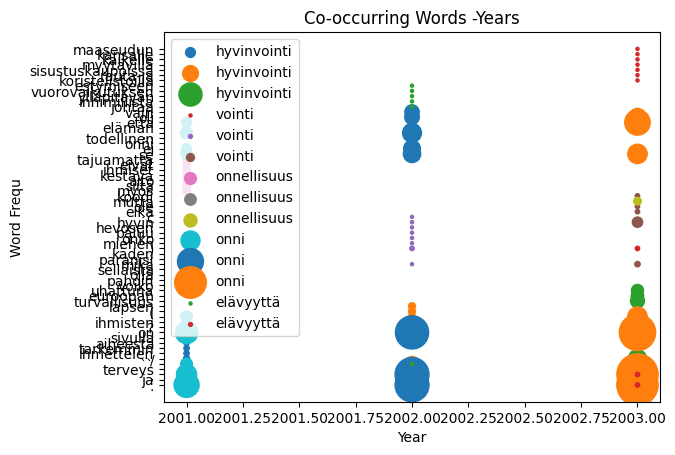

In [34]:
#Section 5
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

df = pd.read_csv('data/filtered_threads.csv')
keywords = ['hyvinvointi', 'vointi', 'onnellisuus', 'onni', 'elämään tyytyväisyyttä', 'elävyyttä']

# nltk.download('punkt')

# Function - find the most frequent co-occurring words
def find_most_frequent_co_occurring_words(data, keyword, year):
    tokens = word_tokenize(data['thread_text'].str.lower().str.cat(sep=' '))
    keyword_indices = [i for i, token in enumerate(tokens) if token == keyword]

    # Initialize a FreqDist
    fdist = FreqDist()
    # Define the window size (3 units)
    window_size = 3

    for keyword_index in keyword_indices:
        window_start = max(0, keyword_index - window_size)
        window_end = min(len(tokens), keyword_index + window_size + 1)
        window_words = tokens[window_start:window_end]
        fdist.update(window_words)

    # Exclude the keyword itself
    del fdist[keyword]

    # Get the 10 most frequent words
    top_words = fdist.most_common(10)

    return top_words

# Initialize a dictionary to store the results
results = {keyword: {} for keyword in keywords}

for year in range(2001, 2004):  # Important! 2018
    year_data = df[df['datetime'].str.startswith(str(year))]
    for keyword in keywords:
        top_words = find_most_frequent_co_occurring_words(year_data, keyword, year)
        results[keyword][year] = top_words

# Plot
plt.figure(figsize=(14, 14))
for keyword, keyword_data in results.items():
    for year, top_words in keyword_data.items():
        if top_words:
            x, y = zip(*top_words)
            x = [year] * len(x)  # Make x a list of the same year value
            plt.scatter(x, y, s=[freq * 5 for freq in y], label=keyword)

plt.xticks(range(2001, 2004))  # Set the x-axis ticks to integer years
plt.xlabel('Year')
plt.ylabel('Word Frequency', fontsize=10)
plt.title('Co-occurring Words - Years')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

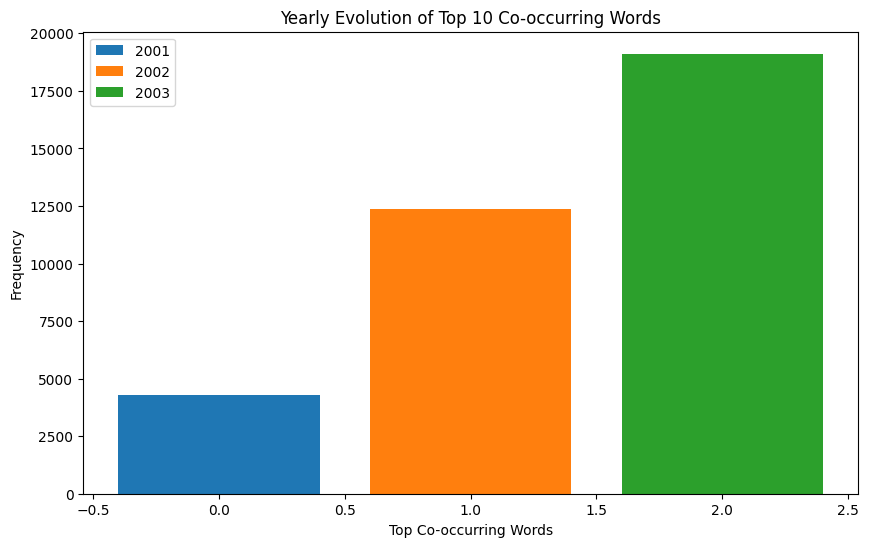

In [43]:
#Section 6
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/filtered_threads.csv')  
df['Year'] = pd.to_datetime(df['datetime']).dt.year

# Group and aggregate the data to find the top 10 co-occurring words for each year
results = []
for year, data in df.groupby('Year'):
    combined_text = ' '.join(data['title'] + ' ' + data['thread_text'])

    # Tokenize and preprocess 
    tokens = combined_text.lower().split()

    # Count the frequency of each word
    word_counts = pd.Series(tokens).value_counts()

    # Select the top 10 co-occurring words for this year
    top_words = word_counts.head(10)

    results.append({'Year': year, 'Top Words': top_words.index, 'Frequencies': top_words.values})

# Create a stacked bar chart for the yearly evolution of top co-occurring words
fig, ax = plt.subplots(figsize=(10, 6))
unique_years = df['Year'].unique()

# Initialize positions for bars
bar_positions = range(len(unique_years))

xtick_positions = []
xtick_labels = []

for i, year in enumerate(unique_years):
    result = next(r for r in results if r['Year'] == year)
    top_words = result['Top Words']
    frequencies = result['Frequencies']
    
    # Plot bars for each year at integer positions
    ax.bar(i, frequencies, label=year)
    
    # Create labels for x-ticks
    xtick_positions.append(i)
    xtick_labels.extend([f'{year}: {word}' for word in top_words])

# Set x-ticks and labels
ax.set_xticks(xtick_positions)
ax.set_xticklabels(unique_years, rotation=45, ha="right")

plt.xlabel('Top Co-occurring Words')
plt.ylabel('Frequency')
plt.title('Yearly Evolution of Top 10 Co-occurring Words')

plt.savefig('yearly_evolution_co-occurring_words.png')
plt.show()

In [56]:
#section 7 
import pandas as pd
import re

df = pd.read_csv('data/filtered_threads.csv')  
df['Year'] = pd.to_datetime(df['datetime']).dt.year

# function to tokenize the discussion titles
def count_tokens(title):
    # Split the title into words (tokens) based on spaces
    tokens = title.split()
    # Count the number of tokens
    num_tokens = len(tokens)
    return num_tokens

# Apply the function to the 'title' column to calculate the number of tokens for each thread
df['Discussion Tokens'] = df['title'].apply(count_tokens)

# Group the data by year and calculate the total discussion tokens for each year
yearly_discussion_tokens = df.groupby('Year')['Discussion Tokens'].sum().reset_index()

# Sort the data to find the top-ranked threads
top_ranked_threads = yearly_discussion_tokens.sort_values(by='Discussion Tokens', ascending=False).head(5)

# Save the results to a new database file
yearly_discussion_tokens.to_csv('data/yearly_dis_tokens.csv', index=False)

# Manually read and record  perception and understanding of the content of the top-ranked threads in a separate file
with open('data/top_ranked_threads_perception.txt', 'w') as file:
    file.write("Top 5 Ranked Threads and  Perceptions:\n\n")
    for idx, row in top_ranked_threads.iterrows():
        year = row['Year']
        tokens = row['Discussion Tokens']
        thread_data = df[(df['Year'] == year) & (df['Discussion Tokens'] > 0)].head(1)
        title = thread_data.iloc[0]['title']
        thread_text = thread_data.iloc[0]['thread_text']
        file.write(f"Year: {year}\nDiscussion Tokens: {tokens}\nThread Title: {title}\nThread Text: {thread_text}\n\n")

# Display the results and the top-ranked threads
print("Yearly Discussion Tokens:")
print(yearly_discussion_tokens)
print("\nTop 5 Ranked Threads:")
print(top_ranked_threads)

Yearly Discussion Tokens:
   Year  Discussion Tokens
0  2001                505
1  2002               1008
2  2003               1965

Top 5 Ranked Threads:
   Year  Discussion Tokens
2  2003               1965
1  2002               1008
0  2001                505


In [1]:
import pandas as pd
import gensim
from gensim import corpora, models
import sqlite3
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# nltk.download('stopwords')
# nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def tokenize_and_preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

data = pd.read_csv('data/filtered_threads.csv')  

# Create a SQLite database
conn = sqlite3.connect('topic_modelingdb.db')

# Group threads by year
data['year'] = pd.to_datetime(data['datetime']).dt.year
years = data['year'].unique()

with conn:
    c = conn.cursor()
    c.execute('''
    CREATE TABLE IF NOT EXISTS topic_modelingdb (
        year INTEGER,
        topic_id INTEGER,
        keywords TEXT
    )
    ''')

for year in years:
    year_data = data[data['year'] == year]
    documents = year_data['thread_text'].apply(tokenize_and_preprocess).tolist()
    year_str = str(year)

    dictionary = corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    lda_model = gensim.models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

    # Store the LDA results in the database
    with conn:
        c = conn.cursor()
        for topic_id, topic in lda_model.print_topics(num_words=5):
            
            c.execute("INSERT INTO topic_modelingdb (year, topic_id, keywords) VALUES (?, ?, ?)",
                      (year_str, topic_id, topic))

# Export results to an Excel file
results_df = pd.read_sql_query("SELECT * FROM topic_modelingdb", conn)
results_df.to_excel('data/topic_modelingdb.xlsx', index=False)

print (results_df)



   year  topic_id                                           keywords
0  2001         0  0.030*"ja" + 0.012*"ei" + 0.011*"..." + 0.009*...
1  2001         1  0.014*"ja" + 0.011*"``" + 0.005*"ei" + 0.004*"...
2  2002         0  0.036*"ja" + 0.011*"ei" + 0.009*"``" + 0.009*"...
3  2002         1  0.014*"ja" + 0.010*"..." + 0.009*"--" + 0.006*...
4  2003         0  0.036*"ja" + 0.011*"ei" + 0.010*"että" + 0.009...
5  2003         1  0.028*"ja" + 0.018*"``" + 0.008*"oli" + 0.007*...
